In [9]:
import pandas as pd

In [1]:
from tensorflow.keras.layers import Input

# Create an input layer of shape 1
input_tensor = Input(shape=(1,))

input_tensor  # is a tensor

2021-11-24 17:32:33.477375: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-24 17:32:33.477391: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'input_1')>

In [2]:
from tensorflow.keras.layers import Input, Dense

# Input layer
input_tensor = Input(shape=(1,))

# Dense layer
output_layer = Dense(1)

print(output_layer)  # is a layer

# Connect the dense layer to the input tensor
output_tensor = output_layer(input_tensor)

print(output_tensor)  # is a tensor

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense/BiasAdd:0', description="created by layer 'dense'")


2021-11-24 17:32:34.237359: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-24 17:32:34.237377: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-24 17:32:34.237388: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (AR2RCD0J3): /proc/driver/nvidia/version does not exist
2021-11-24 17:32:34.237868: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
from tensorflow.keras.layers import Input, Dense

# Input layer
input_tensor = Input(shape=(1,))

# Create a dense layer and connect the dense layer to the input_tensor in one step
output_tensor = Dense(1)(input_tensor)

In [4]:
from tensorflow.keras.layers import Input, Dense

input_tensor = Input(shape=(1,))
output_tensor = Dense(1)(input_tensor)

# Build the model
from tensorflow.keras.models import Model

model = Model(input_tensor, output_tensor)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


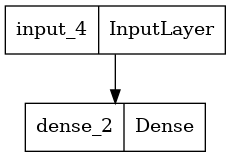

In [6]:
# Visualize a model
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot as plt

# Summarize the model
model.summary()

# Plot the model
plot_model(model)

In [21]:
# Data for regression problem
games_tourney = pd.read_csv('games_tourney.csv')

predictor, target = games_tourney.seed_diff.values, games_tourney.score_diff.values

from sklearn.model_selection import train_test_split

predictor_train, predictor_test, target_train, target_test = \
    train_test_split(predictor, target, test_size=0.2)

In [27]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_tensor = Input(shape=(1,))
output_tensor = Dense(1)(input_tensor)
model = Model(input_tensor, output_tensor)
model.compile(optimizer='adam', loss='mae')

model.fit(
    predictor_train, target_train,
    epochs=10, batch_size=2**7, validation_split=.1
)

model.evaluate(predictor_test, target_test)

Epoch 1/10
24/24 [==============================] - 0s 2ms/step - loss: 9.5212 - val_loss: 9.6803
Epoch 2/10
24/24 [==============================] - 0s 827us/step - loss: 9.4843 - val_loss: 9.6489
Epoch 3/10
24/24 [==============================] - 0s 822us/step - loss: 9.4532 - val_loss: 9.6244
Epoch 4/10
24/24 [==============================] - 0s 813us/step - loss: 9.4242 - val_loss: 9.6059
Epoch 5/10
24/24 [==============================] - 0s 793us/step - loss: 9.3997 - val_loss: 9.5874
Epoch 6/10
24/24 [==============================] - 0s 757us/step - loss: 9.3750 - val_loss: 9.5703
Epoch 7/10
24/24 [==============================] - 0s 795us/step - loss: 9.3532 - val_loss: 9.5559
Epoch 8/10
24/24 [==============================] - 0s 778us/step - loss: 9.3361 - val_loss: 9.5450
Epoch 9/10
24/24 [==============================] - 0s 806us/step - loss: 9.3214 - val_loss: 9.5344
Epoch 10/10
27/27 [==============================] - 0s 309us/step - loss: 8.8081


8.808145523071289